In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Exploratory Data Analysis
###########################################################################################################################

In [4]:
df = pd.read_csv('Loan_Default.csv')

In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
df = df.drop('ID',axis=1)
df = df.drop('Interest_rate_spread',axis=1)
df = df.drop('LTV',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

<Axes: xlabel='Status', ylabel='count'>

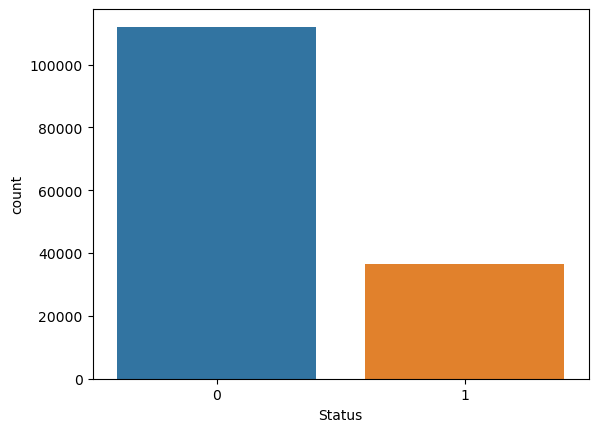

In [8]:
sns.countplot(x='Status',data=df)

<Axes: xlabel='loan_amount', ylabel='Count'>

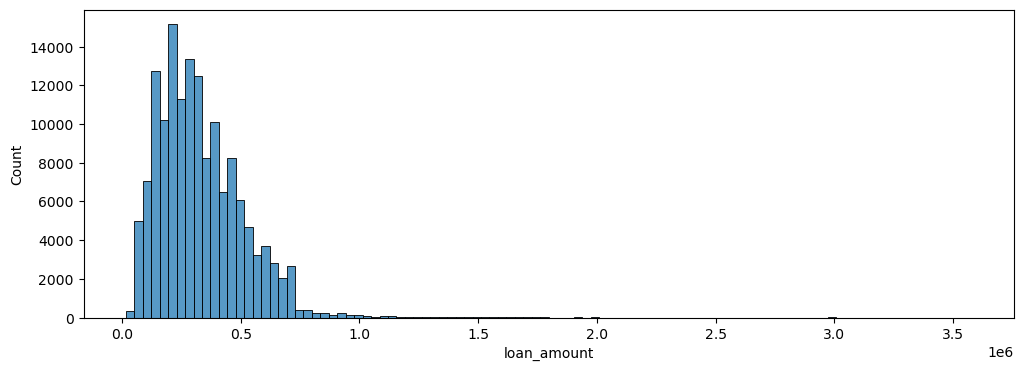

In [9]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amount'],bins=100)

In [10]:
df.corr()

C:\Users\rockc\AppData\Local\Temp\ipykernel_4816\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,Status,dtir1
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,NaN,1.000000,-0.150844,0.065556,0.174474,0.734249,0.456065,0.004438,-0.036825,0.015029
rate_of_interest,NaN,-0.150844,1.000000,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,0.022957,0.055124
Upfront_charges,NaN,0.065556,-0.076473,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.019138,0.000115
term,NaN,0.174474,0.209330,-0.054960,1.000000,0.045117,-0.053785,-0.003149,-0.000240,0.110572
property_value,NaN,0.734249,-0.122613,0.053043,0.045117,1.000000,0.414883,0.002430,-0.048864,-0.056288
income,NaN,0.456065,-0.041809,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.065119,-0.267807
Credit_Score,NaN,0.004438,-0.001331,-0.001484,-0.003149,0.002430,0.000802,1.000000,0.004004,-0.000313
Status,NaN,-0.036825,0.022957,-0.019138,-0.000240,-0.048864,-0.065119,0.004004,1.000000,0.078083
dtir1,NaN,0.015029,0.055124,0.000115,0.110572,-0.056288,-0.267807,-0.000313,0.078083,1.000000


C:\Users\rockc\AppData\Local\Temp\ipykernel_4816\3789240931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<Axes: >

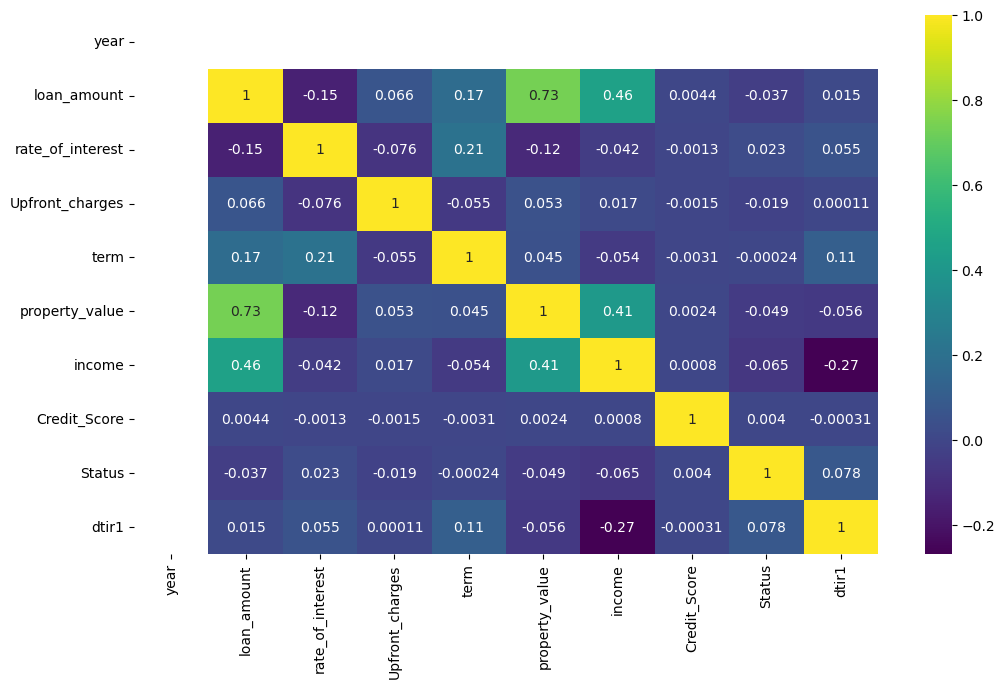

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Axes: xlabel='Status', ylabel='loan_amount'>

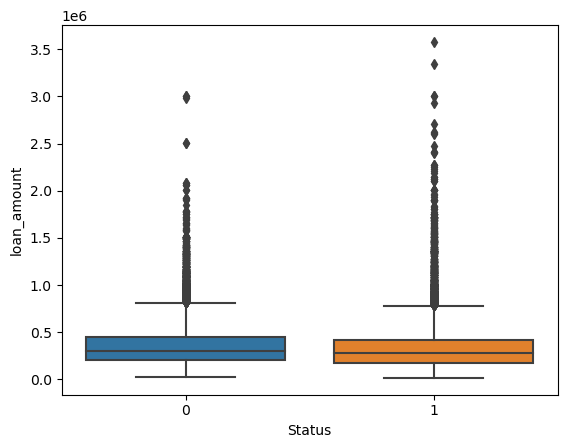

In [12]:
sns.boxplot(x='Status',y='loan_amount',data=df)

In [13]:
df.groupby('Status')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,334990.774875,174916.570573,26500.0,206500.0,306500.0,446500.0,3006500.0
1,36639.0,319275.184912,208576.810054,16500.0,176500.0,276500.0,416500.0,3576500.0


C:\Users\rockc\AppData\Local\Temp\ipykernel_4816\3933494091.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Status'].sort_values().drop('Status').plot(kind='bar')


<Axes: >

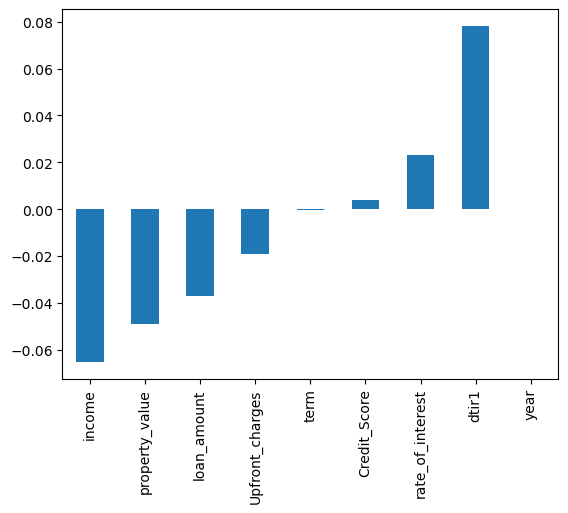

In [14]:
df.corr()['Status'].sort_values().drop('Status').plot(kind='bar')

In [15]:
#Data Preprocessing
###########################################################################################################################

In [16]:
df.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status,dtir1
0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1,45.0
1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1,NaN
2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0,46.0
3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0,42.0
4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0,39.0


In [17]:
len(df)

148670

In [18]:
#Number of missing values per column
df.isnull().sum()

year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
Region                           0
Security_Type       

In [19]:
#Percentage of missing values per column
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Upfront_charges              0.266644
rate_of_interest             0.245100
dtir1                        0.162245
property_value               0.101554
income                       0.061546
loan_limit                   0.022493
approv_in_adv                0.006107
submission_of_application    0.001345
age                          0.001345
loan_purpose                 0.000901
Neg_ammortization            0.000814
term                         0.000276
Region                       0.000000
total_units                  0.000000
Security_Type                0.000000
Credit_Score                 0.000000
Status                       0.000000
credit_type                  0.000000
co-applicant_credit_type     0.000000
year                         0.000000
Secured_by                   0.000000
occupancy_type               0.000000
construction_type            0.000000
interest_only                0.000000
loan_amount                  0.000000
business_or_commercial       0.000000
open_credit 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [21]:
#Dummy variable encoding
###########################################################################################################################

In [22]:
#To get a list of all categorical variables
df.select_dtypes(['object']).columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [23]:
#Note for replacing values in a column with different values
#df[column_name] = df['column_name'].replace([list of items to replace],[list of replacements])

In [24]:
df['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [25]:
loan_limit = pd.get_dummies(df['loan_limit'],drop_first=True)
df.drop('loan_limit',axis=1,inplace=True)
df = pd.concat([df,loan_limit],axis=1)

In [26]:
df['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [27]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)
df.drop('Gender',axis=1,inplace=True)
df = pd.concat([df,Gender],axis=1)

In [28]:
df['approv_in_adv'].value_counts()

nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64

In [29]:
approv_in_adv = pd.get_dummies(df['approv_in_adv'],drop_first=True)
df.drop('approv_in_adv',axis=1,inplace=True)
df = pd.concat([df,approv_in_adv],axis=1)

In [30]:
df['loan_type'].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [31]:
loan_type = pd.get_dummies(df['loan_type'],drop_first=True)
df.drop('loan_type',axis=1,inplace=True)
df = pd.concat([df,loan_type],axis=1)

In [32]:
df['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [33]:
loan_purpose = pd.get_dummies(df['loan_purpose'],drop_first=True)
df.drop('loan_purpose',axis=1,inplace=True)
df = pd.concat([df,loan_purpose],axis=1)

In [34]:
df['Credit_Worthiness'].value_counts()

l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64

In [35]:
Credit_Worthiness = pd.get_dummies(df['Credit_Worthiness'],drop_first=True)
df.drop('Credit_Worthiness',axis=1,inplace=True)
df = pd.concat([df,Credit_Worthiness],axis=1)

In [36]:
df['open_credit'].value_counts()

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [37]:
open_credit = pd.get_dummies(df['open_credit'],drop_first=True)
df.drop('open_credit',axis=1,inplace=True)
df = pd.concat([df,open_credit],axis=1)

In [38]:
df['business_or_commercial'].value_counts()

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64

In [39]:
business_or_commercial = pd.get_dummies(df['business_or_commercial'],drop_first=True)
df.drop('business_or_commercial',axis=1,inplace=True)
df = pd.concat([df,business_or_commercial],axis=1)

In [40]:
df['Neg_ammortization'].value_counts()

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64

In [41]:
Neg_ammortization = pd.get_dummies(df['Neg_ammortization'],drop_first=True)
df.drop('Neg_ammortization',axis=1,inplace=True)
df = pd.concat([df,Neg_ammortization],axis=1)

In [42]:
df['interest_only'].value_counts()

not_int     141560
int_only      7110
Name: interest_only, dtype: int64

In [43]:
interest_only = pd.get_dummies(df['interest_only'],drop_first=True)
df.drop('interest_only',axis=1,inplace=True)
df = pd.concat([df,interest_only],axis=1)

In [44]:
df['lump_sum_payment'].value_counts()

not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64

In [45]:
lump_sum_payment = pd.get_dummies(df['lump_sum_payment'],drop_first=True)
df.drop('lump_sum_payment',axis=1,inplace=True)
df = pd.concat([df,lump_sum_payment],axis=1)

In [46]:
df['construction_type'].value_counts()

sb    148637
mh        33
Name: construction_type, dtype: int64

In [47]:
construction_type = pd.get_dummies(df['construction_type'],drop_first=True)
df.drop('construction_type',axis=1,inplace=True)
df = pd.concat([df,construction_type],axis=1)

In [48]:
df['occupancy_type'].value_counts()

pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int64

In [49]:
occupancy_type = pd.get_dummies(df['occupancy_type'],drop_first=True)
df.drop('occupancy_type',axis=1,inplace=True)
df = pd.concat([df,occupancy_type],axis=1)

In [50]:
df['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [51]:
Secured_by = pd.get_dummies(df['Secured_by'],drop_first=True)
df.drop('Secured_by',axis=1,inplace=True)
df = pd.concat([df,Secured_by],axis=1)

In [52]:
df['total_units'].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [53]:
total_units = pd.get_dummies(df['total_units'],drop_first=True)
df.drop('total_units',axis=1,inplace=True)
df = pd.concat([df,total_units],axis=1)

In [54]:
df['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

In [55]:
credit_type = pd.get_dummies(df['credit_type'],drop_first=True)
df.drop('credit_type',axis=1,inplace=True)
df = pd.concat([df,credit_type],axis=1)

In [56]:
df['co-applicant_credit_type'].value_counts()

CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64

In [57]:
co_applicant_credit_type = pd.get_dummies(df['co-applicant_credit_type'],drop_first=True)
df.drop('co-applicant_credit_type',axis=1,inplace=True)
df = pd.concat([df,co_applicant_credit_type],axis=1)

In [58]:
df['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [59]:
age = pd.get_dummies(df['age'],drop_first=True)
df.drop('age',axis=1,inplace=True)
df = pd.concat([df,age],axis=1)

In [60]:
df['submission_of_application'].value_counts()

to_inst     95814
not_inst    52656
Name: submission_of_application, dtype: int64

In [61]:
submission_of_application = pd.get_dummies(df['submission_of_application'],drop_first=True)
df.drop('submission_of_application',axis=1,inplace=True)
df = pd.concat([df,submission_of_application],axis=1)

In [62]:
df['Region'].value_counts()

North         74722
south         64016
central        8697
North-East     1235
Name: Region, dtype: int64

In [63]:
Region = pd.get_dummies(df['Region'],drop_first=True)
df.drop('Region',axis=1,inplace=True)
df = pd.concat([df,Region],axis=1)

In [64]:
df['Security_Type'].value_counts()

direct      148637
Indriect        33
Name: Security_Type, dtype: int64

In [65]:
Security_Type = pd.get_dummies(df['Security_Type'],drop_first=True)
df.drop('Security_Type',axis=1,inplace=True)
df = pd.concat([df,Security_Type],axis=1)

In [66]:
#Imputation scheme
###########################################################################################################################

In [67]:
#Percentage of missing values per column
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Upfront_charges      0.266644
rate_of_interest     0.245100
dtir1                0.162245
property_value       0.101554
income               0.061546
term                 0.000276
year                 0.000000
35-44                0.000000
land                 0.000000
2U                   0.000000
3U                   0.000000
4U                   0.000000
CRIF                 0.000000
EQUI                 0.000000
EXP                  0.000000
EXP                  0.000000
<25                  0.000000
45-54                0.000000
55-64                0.000000
65-74                0.000000
pr                   0.000000
>74                  0.000000
to_inst              0.000000
North-East           0.000000
central              0.000000
south                0.000000
sr                   0.000000
not_int              0.000000
sb                   0.000000
not_lpsm             0.000000
Credit_Score         0.000000
Status               0.000000
ncf                  0.000000
Joint     

In [68]:
df.corr()['Upfront_charges'].sort_values()

p4                  -0.152549
type2               -0.151732
rate_of_interest    -0.076473
Joint               -0.073651
term                -0.054960
type3               -0.051998
35-44               -0.045714
<25                 -0.034124
Male                -0.030004
pr                  -0.029623
EQUI                -0.019277
Status              -0.019138
sr                  -0.016121
EXP                 -0.014737
p2                  -0.013753
l2                  -0.006602
Credit_Score        -0.001484
dtir1                0.000115
not_int              0.000746
EXP                  0.004481
CRIF                 0.008355
not_lpsm             0.009544
central              0.011529
North-East           0.011712
income               0.016580
pre                  0.018524
45-54                0.021965
not_neg              0.024381
2U                   0.026137
4U                   0.028977
>74                  0.030563
3U                   0.034589
65-74                0.041352
ncf       

In [69]:
to_inst_avg = df.groupby('to_inst').mean()['Upfront_charges']
to_inst_avg

to_inst
0    1868.852935
1    4105.797773
Name: Upfront_charges, dtype: float64

In [70]:
def fill_Upfront_charges(to_inst,Upfront_charges):
    if np.isnan(Upfront_charges):
        return to_inst_avg[to_inst]
    else:
        return Upfront_charges

In [71]:
df['Upfront_charges'] = df.apply(lambda x: fill_Upfront_charges(x['to_inst'],x['Upfront_charges']),axis=1)

In [72]:
df.corr()['rate_of_interest'].sort_values()

p4                  -0.326900
type3               -0.260487
pr                  -0.221300
not_neg             -0.178116
loan_amount         -0.150844
property_value      -0.122613
Upfront_charges     -0.069821
type2               -0.051474
Joint               -0.050507
EXP                 -0.043587
income              -0.041809
EXP                 -0.028945
35-44               -0.026336
south               -0.015511
Male                -0.008022
Credit_Score        -0.001331
45-54                0.000788
North-East           0.002609
>74                  0.004093
65-74                0.007697
central              0.008597
not_int              0.009160
Sex Not Available    0.011762
CRIF                 0.013033
not_lpsm             0.015249
<25                  0.020256
Status               0.022957
EQUI                 0.023255
sr                   0.023694
55-64                0.026661
ncf                  0.029347
3U                   0.037996
2U                   0.051120
nob/c     

In [73]:
p4_avg = df.groupby('p4').mean()['rate_of_interest']
p4_avg

p4
0    4.188048
1    3.809253
Name: rate_of_interest, dtype: float64

In [74]:
def fill_rate_of_interest(p4,rate_of_interest):
    if np.isnan(rate_of_interest):
        return p4_avg[p4]
    else:
        return rate_of_interest

In [75]:
df['rate_of_interest'] = df.apply(lambda x: fill_rate_of_interest(x['p4'],x['rate_of_interest']),axis=1)

In [76]:
df.corr()['income'].sort_values()

dtir1               -0.267807
pr                  -0.193648
to_inst             -0.181495
type2               -0.141532
p3                  -0.119739
65-74               -0.095869
>74                 -0.076309
type3               -0.073016
Status              -0.065119
term                -0.053785
Sex Not Available   -0.046379
rate_of_interest    -0.036406
<25                 -0.029575
EQUI                -0.024686
central             -0.016984
North-East          -0.016907
Male                -0.014825
not_int             -0.013757
pre                 -0.013628
EXP                 -0.005928
55-64               -0.004815
land                -0.004775
p2                  -0.002689
CRIF                -0.000028
Upfront_charges      0.000078
Credit_Score         0.000802
not_neg              0.003657
direct               0.004775
sb                   0.004775
south                0.006306
not_lpsm             0.009251
l2                   0.016298
2U                   0.023120
3U        

In [77]:
loan_amount_avg = df.groupby('loan_amount').mean()['income']
loan_amount_avg

loan_amount
16500        2260.000000
26500        1980.000000
36500        1946.896552
46500        2162.341463
56500        3038.426966
               ...      
2926500     64020.000000
2986500     61500.000000
3006500     68475.000000
3346500     33840.000000
3576500    119340.000000
Name: income, Length: 211, dtype: float64

In [78]:
def fill_income(loan_amount,income):
    if np.isnan(income):
        return loan_amount_avg[loan_amount]
    else:
        return income

In [79]:
df['income'] = df.apply(lambda x: fill_income(x['loan_amount'],x['income']),axis=1)

In [80]:
df.corr()['dtir1'].sort_values()

income              -0.267627
nob/c               -0.175462
p4                  -0.098259
property_value      -0.056288
EXP                 -0.047449
Joint               -0.046791
45-54               -0.033332
p2                  -0.026441
55-64               -0.024483
sr                  -0.023049
35-44               -0.020156
not_neg             -0.019590
opc                 -0.010943
not_lpsm            -0.007283
EQUI                -0.002179
land                -0.001913
4U                  -0.001248
Sex Not Available   -0.000500
Credit_Score        -0.000313
ncf                  0.000866
Upfront_charges      0.001771
direct               0.001913
sb                   0.001913
EXP                  0.004393
CRIF                 0.006178
Male                 0.006487
not_int              0.006508
south                0.007058
3U                   0.008162
to_inst              0.009886
<25                  0.012580
North-East           0.014045
pre                  0.014122
l2        

In [81]:
income_avg = df.groupby('income').mean()['dtir1']
income_avg

income
0.0         12.531609
60.0        23.600000
120.0       22.222222
180.0       29.000000
240.0       26.933333
              ...    
329460.0    19.000000
335880.0    13.000000
374400.0    11.000000
377220.0     5.000000
578580.0     7.000000
Name: dtir1, Length: 1121, dtype: float64

In [82]:
def fill_dtir1(income,dtir1):
    if np.isnan(dtir1):
        return income_avg[income]
    else:
        return dtir1

In [83]:
df['dtir1'] = df.apply(lambda x: fill_dtir1(x['income'],x['dtir1']),axis=1)

In [84]:
df.corr()['property_value'].sort_values()

to_inst             -0.303910
type2               -0.215923
rate_of_interest    -0.113366
Sex Not Available   -0.084092
type3               -0.080033
not_int             -0.055344
pre                 -0.052674
<25                 -0.051557
Status              -0.048864
dtir1               -0.045692
p3                  -0.035214
central             -0.031472
Male                -0.029112
65-74               -0.028112
EQUI                -0.026816
EXP                 -0.025250
sr                  -0.025083
North-East          -0.013479
pr                  -0.010215
land                -0.009802
>74                 -0.000586
p2                   0.000544
Credit_Score         0.002430
55-64                0.003496
CRIF                 0.004072
not_lpsm             0.004965
direct               0.009802
sb                   0.009802
35-44                0.020742
not_neg              0.026551
l2                   0.028046
Upfront_charges      0.028738
south                0.032018
term      

In [85]:
loan_amount_avg = df.groupby('loan_amount').mean()['property_value']
loan_amount_avg

loan_amount
16500      5.300000e+04
26500      8.147826e+04
36500      1.010612e+05
46500      1.008723e+05
56500      2.068937e+05
               ...     
2926500    4.878000e+06
2986500    5.508000e+06
3006500    4.841333e+06
3346500             NaN
3576500    5.208000e+06
Name: property_value, Length: 211, dtype: float64

In [86]:
def fill_property_value(loan_amount,property_value):
    if np.isnan(property_value):
        return loan_amount_avg[loan_amount]
    else:
        return property_value

In [87]:
df['property_value'] = df.apply(lambda x: fill_property_value(x['loan_amount'],x['property_value']),axis=1)

In [88]:
df = df.dropna(axis=0)

In [89]:
#Number of missing values per column
df.isnull().sum()

year                 0
loan_amount          0
rate_of_interest     0
Upfront_charges      0
term                 0
property_value       0
income               0
Credit_Score         0
Status               0
dtir1                0
ncf                  0
Joint                0
Male                 0
Sex Not Available    0
pre                  0
type2                0
type3                0
p2                   0
p3                   0
p4                   0
l2                   0
opc                  0
nob/c                0
not_neg              0
not_int              0
not_lpsm             0
sb                   0
pr                   0
sr                   0
land                 0
2U                   0
3U                   0
4U                   0
CRIF                 0
EQUI                 0
EXP                  0
EXP                  0
35-44                0
45-54                0
55-64                0
65-74                0
<25                  0
>74                  0
to_inst    

In [90]:
#Save preprocessed df file as df_clean.csv
df.to_csv('df_clean')

In [91]:
#Train_test_split & scaling
############################################################################################################################

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146964 entries, 0 to 148669
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               146964 non-null  int64  
 1   loan_amount        146964 non-null  int64  
 2   rate_of_interest   146964 non-null  float64
 3   Upfront_charges    146964 non-null  float64
 4   term               146964 non-null  float64
 5   property_value     146964 non-null  float64
 6   income             146964 non-null  float64
 7   Credit_Score       146964 non-null  int64  
 8   Status             146964 non-null  int64  
 9   dtir1              146964 non-null  float64
 10  ncf                146964 non-null  uint8  
 11  Joint              146964 non-null  uint8  
 12  Male               146964 non-null  uint8  
 13  Sex Not Available  146964 non-null  uint8  
 14  pre                146964 non-null  uint8  
 15  type2              146964 non-null  uint8  
 16  ty

In [94]:
X = df.drop('Status',axis=1).values
y = df['Status'].values

In [95]:
#If you want to take a sample of the full dataset
#df_samp = df.sample(frac=0.1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
#Creating the Model
############################################################################################################################

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
X_train.shape

(117571, 47)

In [103]:
model = Sequential()

model.add(Dense(47,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(23,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
#Sigmoid for binary predictions

model.compile(loss='binary_crossentropy',optimizer='adam')

In [104]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [105]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop],batch_size=256)

Epoch 1/600
460/460 [==============================] - 3s 4ms/step - loss: 0.4392 - val_loss: 0.3628
Epoch 2/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3742 - val_loss: 0.3567
Epoch 3/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3642 - val_loss: 0.3524
Epoch 4/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3585 - val_loss: 0.3484
Epoch 5/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3531 - val_loss: 0.3466
Epoch 6/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3474 - val_loss: 0.3389
Epoch 7/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3419 - val_loss: 0.3306
Epoch 8/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3338 - val_loss: 0.3179
Epoch 9/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3043 - val_loss: 0.2493
Epoch 10/600
460/460 [==============================] - 2s 4ms/step - loss: 0.2344 - val_lo

In [106]:
#Model Evaluation
###########################################################################################################################

In [107]:
#To save a model
#from tensorflow.keras.models import load_model
#model.save('my_model.h5')

<Axes: >

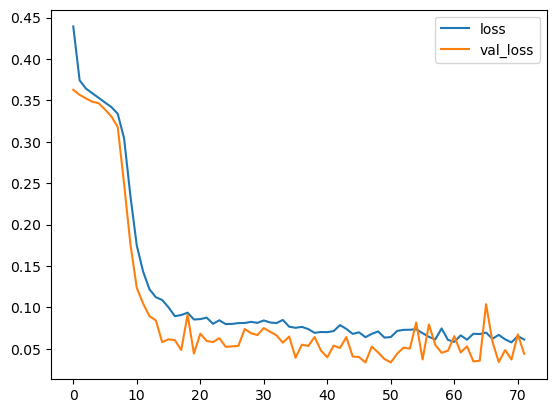

In [108]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
#Get predictions
predictions = model.predict(X_test)
default = predictions>0.5
no_default = predictions<=0.5
predictions[default] = 1
predictions[no_default] = 0
del default
del no_default

919/919 [==============================] - 1s 2ms/step


In [111]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
#Here we got 98% accuracy

[[21522   471]
 [    1  7399]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21993
           1       0.94      1.00      0.97      7400

    accuracy                           0.98     29393
   macro avg       0.97      0.99      0.98     29393
weighted avg       0.98      0.98      0.98     29393



In [112]:
#Tensorboard visualizations
############################################################################################################################

In [113]:
from tensorflow.keras.callbacks import TensorBoard

In [114]:
pwd
#print working directory

'C:\\Users\\rockc\\OneDrive\\Documents\\Python for Data Science and Machine Learning Bootcamp\\Py_DS_ML_Bootcamp-master\\22-Deep Learning'

In [115]:
log_directory = 'logs\\fit'

In [116]:
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
                   write_graph=True,
                   write_images=True,
                   update_freq='epoch',
                   profile_batch=2,
                   embeddings_freq=1)

In [117]:
#Now we redefine and refit the model
model = Sequential()

model.add(Dense(47,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(23,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
#Sigmoid for binary predictions

model.compile(loss='binary_crossentropy',optimizer='adam')

In [118]:
#Note the reference to board under callbacks
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop,board],batch_size=256)

Epoch 1/600
460/460 [==============================] - 4s 6ms/step - loss: 0.4442 - val_loss: 0.3628
Epoch 2/600
460/460 [==============================] - 2s 5ms/step - loss: 0.3724 - val_loss: 0.3562
Epoch 3/600
460/460 [==============================] - 2s 5ms/step - loss: 0.3635 - val_loss: 0.3545
Epoch 4/600
460/460 [==============================] - 2s 4ms/step - loss: 0.3599 - val_loss: 0.3512
Epoch 5/600
460/460 [==============================] - 2s 5ms/step - loss: 0.3560 - val_loss: 0.3482
Epoch 6/600
460/460 [==============================] - 2s 5ms/step - loss: 0.3520 - val_loss: 0.3453
Epoch 7/600
460/460 [==============================] - 3s 6ms/step - loss: 0.3482 - val_loss: 0.3424
Epoch 8/600
460/460 [==============================] - 3s 6ms/step - loss: 0.3429 - val_loss: 0.3353
Epoch 9/600
460/460 [==============================] - 2s 5ms/step - loss: 0.3325 - val_loss: 0.3145
Epoch 10/600
460/460 [==============================] - 2s 5ms/step - loss: 0.2901 - val_lo

460/460 [==============================] - 3s 6ms/step - loss: 0.0615 - val_loss: 0.0763
Epoch 82/600
460/460 [==============================] - 3s 6ms/step - loss: 0.0585 - val_loss: 0.0338
Epoch 83/600
460/460 [==============================] - 2s 5ms/step - loss: 0.0655 - val_loss: 0.0586
Epoch 84/600
460/460 [==============================] - 2s 5ms/step - loss: 0.0617 - val_loss: 0.0602
Epoch 85/600
460/460 [==============================] - 2s 5ms/step - loss: 0.0639 - val_loss: 0.0436
Epoch 86/600
460/460 [==============================] - 2s 5ms/step - loss: 0.0597 - val_loss: 0.0435
Epoch 87/600
460/460 [==============================] - 3s 6ms/step - loss: 0.0706 - val_loss: 0.0482
Epoch 88/600
460/460 [==============================] - 3s 6ms/step - loss: 0.0677 - val_loss: 0.0744
Epoch 89/600
460/460 [==============================] - 3s 6ms/step - loss: 0.0673 - val_loss: 0.0424
Epoch 90/600
460/460 [==============================] - 2s 5ms/step - loss: 0.0638 - val_loss: 

In [120]:
print(log_directory)

logs\fit


In [121]:
pwd

'C:\\Users\\rockc\\OneDrive\\Documents\\Python for Data Science and Machine Learning Bootcamp\\Py_DS_ML_Bootcamp-master\\22-Deep Learning'

In [122]:
#Note we now run Tensorboard through the command line

In [124]:
#Use cd on the command line to change directory to the file path reported back by pwd or your current .py file location

#run this code in command line
tensorboard --logdir logs\fit